<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Flip-2---Shear-30" data-toc-modified-id="Flip-2---Shear-30-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Flip 2 - Shear 30</a></span><ul class="toc-item"><li><span><a href="#Kinetic-Energy" data-toc-modified-id="Kinetic-Energy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Kinetic Energy</a></span></li><li><span><a href="#Angular-Velocity" data-toc-modified-id="Angular-Velocity-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Angular Velocity</a></span></li><li><span><a href="#Torque" data-toc-modified-id="Torque-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Torque</a></span></li><li><span><a href="#Inertia" data-toc-modified-id="Inertia-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Inertia</a></span></li><li><span><a href="#Quaternion" data-toc-modified-id="Quaternion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Quaternion</a></span></li><li><span><a href="#Center-of-Mass" data-toc-modified-id="Center-of-Mass-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Center of Mass</a></span></li><li><span><a href="#RMSD" data-toc-modified-id="RMSD-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>RMSD</a></span></li></ul></li></ul></div>

# import packages

In [1]:
import numpy as np
import os
# import xlrd
import openpyxl as xl
import pandas as pd
# from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot, plot, init_notebook_mode
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly
plotly.tools.set_credentials_file(username='garyhan', api_key='jb6utiwqOF7F3bAuf1Td')
init_notebook_mode(connected=True)

import math
from math import factorial
#import Image
import numpy as np
from scipy import interpolate

In [2]:
# os.chdir('/Users/changnianhan/Downloads/simulation/sts/')
os.chdir('/Users/changnianhan/OneDrive/Research/Platelets/results/')
# os.chdir('C:/Users/garyh/OneDrive/Research/Platelets/results/')
# os.chdir('D:/OneDrive/Research/Platelets/results/')
# os.listdir('.')

In [3]:
wb = xl.load_workbook("flip-spin50.xlsx", data_only=True)
# workbook.remove(workbook['test'])
# workbook.remove(workbook['test2'])
# workbook.save("test.xlsx")
print(wb.sheetnames)

['f1-50', 'f2-50', 'p1-50', 'p2-50', 'f1-50rmsd', 'f2-50rmsd']


In [4]:
def move_avg(nums, window):
    new_nums = []
    for i in range(window,len(nums)+1):
        new_nums.append(sum(nums[i-window:i])/window)
    return new_nums

def move_avg_time(nums, t, window):
    new_nums = []
    dt = w = 0
    while dt < window:
        w += 1
        dt = t[w] - t[0]
    print(w-1)
#     new_nums.append(nums[0])
    start = 0
    for i in range(w-1,len(nums)):
        dt = t[i] - t[start]
        while dt > window:
            start += 1
            dt = t[i] - t[start]
        new_nums.append(sum(nums[start:i+1])/(i-start+1))
    return new_nums

|**Metric**|Model Value|SI Value|SI unit|
|:-------:|-------:|-------:|:--------|
| **time** 	| 1 	| 2.08|$\mu s$	|
| **length** 	| 1  	| 177.778|$nm$  	|
| **force**     | 1     | 8.132  |$10^{-2}pN$
| **velocity** 	| 1 	| 8.533   |$10^{-2}\frac{m}{s}$|
| **energy** 	| 1 	| 1.446   |$10^{-8}pJ$|
| **torque** 	| 1 	| 1.446   |$10^{-20}N\cdot m$|
| **angular momentum** 	| 1 	| 3.012 | $10^{-26}\frac{kg\cdot m^2}{s}$|
| **angular velocity** 	| 1 	| 0.48 | $\mu s^{-1}$|
| **inertia** 	| 1 	| 6.274 | $10^{-32} kg\cdot{m^2}$|

total # of atoms 1231663

### Jeffery's Orbit

$\theta$: angle  
$\gamma$: shear rate ($s^{-1}$)  
$a, b$: minor and major axes

|**Shear Stress**  ($dyne/cm^2$) |**Shear Rate**  ($us^{-1}$)|
|:---:|---:|
| 10 | 0.000933 	|
| 20 | 0.001866 	|
| 30 | 0.002798  	|
| 50 | 0.004664  |

In [5]:
print(4.33 * 0.177778, 10.4*0.177778, "tario = ", 10.4/4.33)
gamma = 0.004664
J_T = 2*np.pi*(2.4+1/2.4)
print(J_T/2)

0.76977874 1.8488912 tario =  2.4018475750577366
8.84881930761125


\begin{align*}
\theta &= \tan^{-1}\left(\frac{b}{a}\tan\frac{ab\dot\gamma t}{a^2+b^2}\right), \qquad \dot\theta = \frac{\dot\gamma}{a^2+b^2}\left(b^2\cos^2\theta+a^2\sin^2\theta\right) \\ \\
\theta &= \tan^{-1}\left(\frac{b}{a}\tan\left(\theta_0+\frac{2\pi t}{T_J}\right)\right) \\
T_J &= \frac{2\pi}{\dot\gamma}\left(\frac{b}{a}+\frac{a}{b}\right)
\end{align*}
where $T_J$ is the period.

$$\frac{d\theta}{d\dot\gamma t}=\frac{1}{a^2+b^2}\left(b^2\cos^2\theta+a^2\sin^2\theta\right)$$

In [6]:
J_t = np.linspace(0,6050,3001)
a, b = 0.818, 1.675   #1, 2.4
J_T = 2*np.pi*(a/b+b/a)/gamma
print(J_T*gamma/2)
pivot = (a**2+b**2)*2*np.pi/(a*b*gamma*2)
pline = [172.64, 322.4]
pline = [i*gamma for i in pline]

7.967190403582442


In [ ]:
J_theta = np.arctan((b/a) * np.tan((-a*b*gamma*(J_t+pivot))/(a**2+b**2) + np.pi/2)) - np.pi/2
# J_theta = -np.arctan(2.4 * np.tan((2*np.pi*J_t)/J_T + np.pi/2)) - np.pi/2
J_omega = -2*gamma * (a**2 * (np.sin(J_theta+np.pi/2))**2 + b**2 * (np.cos(J_theta+np.pi/2))**2) / (a**2 + b**2)

Converting to strain: 

In [7]:
x_theta = np.linspace(0,8,800)
J_theta = np.arctan((b/a) * np.tan((-a*b*(x_theta))/(a**2+b**2))) - np.pi/2
# J_theta = -np.arctan(2.4 * np.tan((2*np.pi*J_t)/J_T + np.pi/2)) - np.pi/2
J_omega = -2 * gamma * (a**2 * (np.sin(J_theta+np.pi/2))**2 + b**2 * (np.cos(J_theta+np.pi/2))**2) / (a**2 + b**2)
for i in range(len(J_theta)):
    if J_theta[i] <= -np.pi/2 and x_theta[i] < 4:
        J_theta[i] += np.pi/2
    else:
        J_theta[i] -= np.pi/2

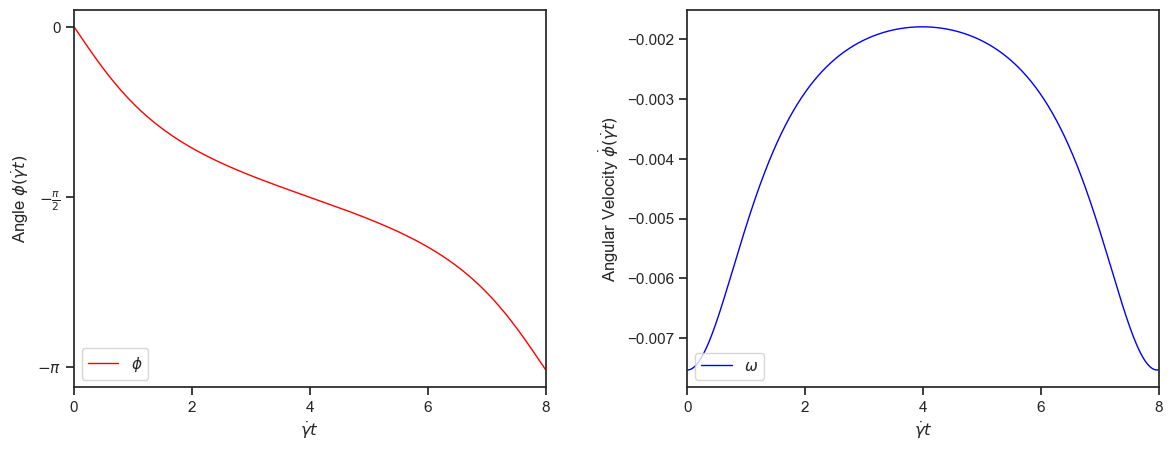

In [9]:
sns.set_style("ticks") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") # paper, notebook, talk, poster
fig = pl.figure(figsize=(14, 5), dpi=100)
ax1 = fig.add_subplot(121)
# ax1.plot(J_t[1:], J_theta[1:], marker='', color='red', linewidth=1, alpha=1, label=r'$\phi$')
ax1.plot(x_theta, J_theta, marker='', color='red', linewidth=1, alpha=1, label=r'$\phi$')
ax1.legend(loc=3, ncol=1)
ax1.set_xlim([0,8])
ax1.set_xticks(range(0,10,2))
ax1.set_yticks([0,-np.pi/2,-np.pi])
ax1.set_yticklabels([0,r'$-\frac{\pi}{2}$',r'$-\pi$'])
ax1.set_xlabel(r'$\dot\gamma t$')
ax1.set_ylabel(r'Angle $\phi (\dot\gamma t)$')

ax2 = fig.add_subplot(122)
# ax2.plot(J_t[1:], J_omega[1:], marker='', color='blue', linewidth=1, alpha=1, label=r'$\omega$')
ax2.plot(x_theta, J_omega, marker='', color='blue', linewidth=1, alpha=1, label=r'$\omega$')
ax2.legend(loc=3, ncol=1)
ax2.set_xlim([0,8])
ax2.set_xticks(range(0,10,2))
ax2.set_xlabel(r'$\dot\gamma t$')
ax2.set_ylabel(r'Angular Velocity $\dot\phi (\dot\gamma t)$')

# fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.2, hspace = 0.2)
fig.subplots_adjust(wspace = 0.3)
# fig.savefig('JO.png', dpi=200, bbox_inches='tight')

## Flip 2 - Shear 50

### Kinetic Energy

In [ ]:
f2_50 = wb['f2-50']
t_sts = [x.value for i,x in enumerate(f2_50['ad']) if x.value is not None and i > 0]
E_t = [x.value*1231663*1.446 for i,x in enumerate(f2_50['l']) if x.value is not None and i > 0]
E_r = [x.value*1231663*1.446 for i,x in enumerate(f2_50['m']) if x.value is not None and i > 0]

In [ ]:
t_ats = [x.value for i,x in enumerate(f2_50['bh']) if x.value is not None]
E_ta = [x.value*1231663*1.446 for i,x in enumerate(f2_50['ap']) if x.value is not None]
E_ra = [x.value*1231663*1.446 for i,x in enumerate(f2_50['aq']) if x.value is not None]
print(len(t_ats), len(E_ta), len(E_ra))
E_ta = move_avg_time(E_ta, t_ats, 20)
E_ra = move_avg_time(E_ra, t_ats, 20)

In [ ]:
t_ats = t_ats[961:]
print(len(t_ats), len(E_ta), len(E_ra))

In [ ]:
print(t_ats5[0],t_ats5[-1],t_ats4[0],t_ats4[-1])
print(len(t_ats5),len(t_ats4))

|**Case**|1|2|3|4|5|
|:---:|---:|---:|---:|---:|---:|
| **Step** 	| 24200 	| 48000 	| 72200 	| 120200 	| 240400  |
| **Moving Window** 	| 122  	| 241  	| 362  	| 602  	| 1203  |
| **Time (us)** 	| 10.0672  	| 19.968  	| 30.0352  	| 50.0032  	| 100.0064  |


In [ ]:
w = 241
E_t = move_avg(E_t, w)
E_r = move_avg(E_r, w)

In [ ]:
E_t5 = move_avg(E_t5, w)
E_r5 = move_avg(E_r5, w)
E_t4 = move_avg(E_t4, w)
E_r4 = move_avg(E_r4, w)
E_t3 = move_avg(E_t3, w)
E_r3 = move_avg(E_r3, w)

In [ ]:
# phase_line0 = go.Scatter(x=[644.8,644.8], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line1 = go.Scatter(x=[1015.04,1015.04], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line2 = go.Scatter(x=[1258.4,1258.4], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line3 = go.Scatter(x=[1778.4,1778.4], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line4 = go.Scatter(x=[2159.04,2159.04], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line5 = go.Scatter(x=[2404.48,2404.48], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)

trace0 = go.Scatter(
    x = t_sts[w-1:],
    y = [i*1.446 for i in E_t],
    mode = 'lines',
    line = dict(color = 'yellowgreen', dash = 'dot'),
    name = r'$E_{tran}^{sts}$'
)
trace1 = go.Scatter(
    x = t_sts[w-1:],
    y = [i*1.446 for i in E_r],
    mode = 'lines',
    line = dict(color = 'lightblue', dash = 'dot'),
    name = r'$E_{rot}^{sts}$'
)
tracea = go.Scatter(
    x = t_ats,
    y = [i*1.446 for i in E_ta],
    mode = 'lines',
    line = dict(color = 'darkgreen'),
    name = r'$E_{tran}^{ats}$'
)
traceb = go.Scatter(
    x = t_ats,
    y = [i*1.446 for i in E_ra],
    mode = 'lines',
    line = dict(color = 'darkblue'),
    name = r'$E_{rot}^{ats}$'
)
# trace2 = go.Scatter(
#     x = t_ats5[961:],
#     y = [i*1.446 for i in E_t5],
#     mode = 'lines',
#     line = dict(color = 'purple'),
#     name = r'$E_{tran5}$'
# )
# trace3 = go.Scatter(
#     x = t_ats5[w-1:],
#     y = [i*1.446 for i in E_r5],
#     mode = 'lines',
#     line = dict(color = 'cyan'),
#     name = r'$E_{rot5}$'
# )
# trace4 = go.Scatter(
#     x = t_ats4[w-1:],
#     y = [i*1.446 for i in E_t4],
#     mode = 'lines',
#     line = dict(color = 'red'),
#     name = r'$E_{tran4}$'
# )
# trace5 = go.Scatter(
#     x = t_ats4[w-1:],
#     y = [i*1.446 for i in E_r4],
#     mode = 'lines',
#     line = dict(color = 'orange'),
#     name = r'$E_{rot4}$'
# )
# trace6 = go.Scatter(
#     x = t_ats3[1602:],
#     y = [i*1.446 for i in E_t3],
#     mode = 'lines',
#     line = dict(color = 'yellow'),
#     name = r'$E_{tran3}$'
# )
# trace7 = go.Scatter(
#     x = t_ats3[1602:],
#     y = [i*1.446 for i in E_r3],
#     mode = 'lines',
#     line = dict(color = 'black'),
#     name = r'$E_{rot3}$'
# )

In [ ]:
layout = go.Layout(
    xaxis=dict(
        range=[0, 500],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title=r'$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
#         range=[1.8, 4.6],
        title=r'$\mbox{Kinetic Energy }(10^{-8}pJ)$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.82,
        y=0.97,
        traceorder='normal',
        font=dict(color='black', size=16),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=700,
    height=300,
    margin=go.layout.Margin(
        l=60,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[trace0,trace1,tracea,traceb], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)

In [ ]:
pio.write_image(fig, 'E50.png', format='png', scale=5)
print("Done!")

### Angular Velocity

In [ ]:
f2_50 = wb['f2-50']
t_sts = [x.value*gamma for i,x in enumerate(f2_50['ad']) if x.value is not None and i > 0]
# body
# w1 = [x.value*1231663 for x in f2_30['n'] if x.value is not None]
# w2 = [x.value*1231663 for x in f2_30['o'] if x.value is not None]
# w3 = [x.value*1231663 for x in f2_30['p'] if x.value is not None]
# space
w1 = [x.value for i,x in enumerate(f2_50['u']) if x.value is not None and i > 0]
w2 = [x.value for i,x in enumerate(f2_50['v']) if x.value is not None and i > 0]
w3 = [x.value for i,x in enumerate(f2_50['w']) if x.value is not None and i > 0]

In [ ]:
# body reference only
# 1605.76 2437.76

print(len(w1),len(t_sts))
for i in range(19260,len(w1)):
    if 1605.76 < t_sts[i] <= 2437.76:
        w1[i],w2[i] = -w2[i],w1[i]
    elif t_sts[i] > 2437.76:
        w1[i],w2[i] = -w1[i],-w2[i]

In [ ]:
w = 241
w1 = move_avg(w1, w)
w2 = move_avg(w2, w)
w3 = move_avg(w3, w)

In [ ]:
t_ats = [x.value*gamma for i,x in enumerate(f2_50['bh']) if x.value is not None and i > 0]
# body
# wa1 = [x.value*1231663 for x in f2_30['ar'] if x.value is not None]
# wa2 = [x.value*1231663 for x in f2_30['as'] if x.value is not None]
# wa3 = [x.value*1231663 for x in f2_30['at'] if x.value is not None]
# space
wa1 = [x.value for i,x in enumerate(f2_50['ay']) if x.value is not None and i > 0]
wa2 = [x.value for i,x in enumerate(f2_50['az']) if x.value is not None and i > 0]
wa3 = [x.value for i,x in enumerate(f2_50['ba']) if x.value is not None and i > 0]
print(len(t_ats), len(wa1), len(wa2), len(wa3))

In [ ]:
# body reference only
# 1258.4 1978.08

for i in range(len(wa1)):
    if 1978.08 >= t_ats[i] > 1258.4:
        wa1[i],wa2[i] = -wa2[i],wa1[i]
    elif t_ats[i] > 1978.08:
        wa1[i],wa2[i] = -wa1[i],-wa2[i]

In [ ]:
wa1 = move_avg_time(wa1, t_ats, 20*gamma)
wa2 = move_avg_time(wa2, t_ats, 20*gamma)
wa3 = move_avg_time(wa3, t_ats, 20*gamma)

In [ ]:
t_ats = t_ats[961:]
print(len(t_ats), len(wa1),wa1[-1])

In [ ]:
# phase_line0 = go.Scatter(x=[644.8,644.8], y=[-0.1,0.1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line1 = go.Scatter(x=[1015.04,1015.04], y=[-0.1,0.1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line2 = go.Scatter(x=[1258.4,1258.4], y=[-0.1,0.1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line3 = go.Scatter(x=[1778.4,1778.4], y=[-0.1,0.1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line4 = go.Scatter(x=[2159.04,2159.04], y=[-0.1,0.1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line5 = go.Scatter(x=[2404.48,2404.48], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)

data1 = go.Scatter(
    x = t_sts[w-1:],
    y = w1,
    mode = 'lines',
    line = dict(color = 'yellowgreen', dash = 'dot'),
    legendgroup = 'sts',
#     name = r'$\omega_{\tilde{x}}^{sts}$'
    name = r'$\omega_x^{sts}$'
)
data2 = go.Scatter(
    x = t_sts[w-1:],
    y = w2,
    mode = 'lines',
    line = dict(color = 'lightblue', dash = 'dot'),
    legendgroup = 'sts',
#     name = r'$\omega_{\tilde{y}}^{sts}$'
    name = r'$\omega_y^{sts}$'
)
data3 = go.Scatter(
    x = t_sts[w-1:],
    y = w3,
    mode = 'lines',
    line = dict(color = 'red', dash = 'dot'),
    legendgroup = 'sts',
#     name = r'$\omega_{\tilde{z}}^{sts}$'
    name = r'$\omega_z^{sts}$'
)
dataa = go.Scatter(
    x = t_ats,
    y = wa1,
    mode = 'lines',
    line = dict(color = 'darkgreen'),
    legendgroup = 'ats',
#     name = r'$\omega_{\tilde{x}}^{ats}$'
    name = r'$\omega_x^{ats}$'
)
datab = go.Scatter(
    x = t_ats,
    y = wa2,
    mode = 'lines',
    line = dict(color = 'darkblue'),
    legendgroup = 'ats',
#     name = r'$\omega_{\tilde{y}}^{ats}$'
    name = r'$\omega_y^{ats}$'
)
datac = go.Scatter(
    x = t_ats,
    y = wa3,
    mode = 'lines',
    line = dict(color = 'darkred'),
    legendgroup = 'ats',
#     name = r'$\omega_{\tilde{z}}^{ats}$'
    name = r'$\omega_z^{ats}$'
)
# dataJO = go.Scatter(
#     x = J_t[1:],
#     y = J_omega[1:],
#     mode = 'lines',
#     line = dict(color = 'cyan',dash='dash'),
#     name = r'$\omega_J$'
# )

In [ ]:
layout = go.Layout(
    xaxis=dict(
        range=[0, 500],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title=r'$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
        range=[-0.01, 0.001],
        title=r'$\text{Angular Velocity } (\mu s^{-1})$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.82,
        y=0.03,
        traceorder='normal',
        font=dict(color='black', size=16),
#         orientation="h",
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=700,
    height=300,
    margin=go.layout.Margin(
        l=80,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[data1, data2, data3, dataa, datab, datac], layout=layout)
iplot(fig)

In [ ]:
pio.write_image(fig, 'omega_space50.png', format='png', scale=5)
print("Done!")

seaborn plot:

In [ ]:
sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") # paper, notebook, talk, poster
fig = pl.figure(figsize=(14, 7), dpi=100)
ax1 = fig.add_subplot(111)
# # ax1.plot(J_t[1:], J_omega[1:], marker='.', markersize=1, color='cyan', linewidth=1, alpha=1, label=r'$\omega_J$')
# ax1.plot([644.8,644.8], [-0.1,0.1], linestyle='-.', color='lightgreen', linewidth=1, alpha=1)
# ax1.plot([1015.04,1015.04], [-0.1,0.1], linestyle='-.', color='lightgreen', linewidth=1, alpha=1)
# ax1.plot([1258.4,1258.4], [-0.1,0.1], linestyle='-.', color='lightgreen', linewidth=1, alpha=1)
# ax1.plot([1778.4,1778.4], [-0.1,0.1], linestyle='-.', color='lightgreen', linewidth=1, alpha=1)
# ax1.plot([2159.04,2159.04], [-0.1,0.1], linestyle='-.', color='lightgreen', linewidth=1, alpha=1)

ax1.plot(t_sts[w-1:], w1, marker='.', markersize=0.01, color='yellowgreen', linewidth=1, alpha=0.5, label=r'$\omega_{\tilde{x}}^{sts}$')
ax1.plot(t_sts[w-1:], w2, marker='.', markersize=0.01, color='lightblue', linewidth=1, alpha=0.5, label=r'$\omega_{\tilde{y}}^{sts}$')
ax1.plot(t_sts[w-1:], w3, marker='.', markersize=0.01, color='red', linewidth=1, alpha=0.5, label=r'$\omega_{\tilde{z}}^{sts}$')
ax1.plot(t_ats, wa1, color='darkgreen', linewidth=1, alpha=1, label=r'$\omega_{\tilde{x}}^{ats}$')
ax1.plot(t_ats, wa2, color='darkblue', linewidth=1, alpha=1, label=r'$\omega_{\tilde{y}}^{ats}$')
ax1.plot(t_ats, wa3, color='darkred', linewidth=1, alpha=1, label=r'$\omega_{\tilde{z}}^{ats}$')

ax1.legend(loc=4, ncol=1)
ax1.set_xlim([0,8])
# ax1.set_xticks(range(0,3001,1000))
ax1.set_ylim([-0.01,0.001])
# ax1.set_yticks([0,-np.pi/2,-np.pi])
# ax1.set_yticklabels([0,r'$-\frac{\pi}{2}$',r'$-\pi$'])
ax1.set_xlabel(r'Simulated Time ($\mu s$)')
ax1.set_ylabel(r'Angular Velocity')

# ax2 = fig.add_subplot(122)
# ax2.plot(J_t[1:], J_omega[1:], marker='', color='blue', linewidth=1, alpha=1, label=r'$\omega$')
# ax2.legend(loc=3, ncol=1)
# ax2.set_xlim([0,3150])
# ax2.set_xticks(range(0,3001,500))
# ax2.set_xlabel(r'Time ($\mu s$)')
# ax2.set_ylabel(r'Angular Velocity ($\mu s^{-1}$)')

# fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.2, hspace = 0.2)
# fig.subplots_adjust(wspace = 0.3)

### Torque

In [ ]:
f2_30 = wb['f2-30']
# t_sts = [x.value for x in f2_30['ad'] if x.value is not None]
# t_sts = t_sts[1:]
tq1,tq2,tq3,t_sts = [],[],[],[]
# cells = f2_30['aa':'ad']
for i in range(9333, f2_30.max_row+1):
    tq1.append(f2_30.cell(row=i,column=27).value)
    tq2.append(f2_30.cell(row=i,column=28).value)
    tq3.append(f2_30.cell(row=i,column=29).value)
    t_sts.append(f2_30.cell(row=i,column=30).value)
# print(len(tq1),len(t_sts))
w=1

In [ ]:
tq1 = [x.value for x in f2_30['aa'] if x.value is not None]
tq2 = [x.value for x in f2_30['ab'] if x.value is not None]
tq3 = [x.value for x in f2_30['ac'] if x.value is not None]
# w1 = [x.value for x in f2_30['u'] if x.value is not None]
# w2 = [x.value for x in f2_30['v'] if x.value is not None]
# w3 = [x.value for x in f2_30['w'] if x.value is not None]
tq1, tq2, tq3 = tq1[1:], tq2[1:], tq3[1:] # om1, om2, om3 = om1[1:], om2[1:], om3[1:]

In [ ]:
w = 602
tq1 = move_avg(tq1, w)
tq2 = move_avg(tq2, w)
tq3 = move_avg(tq3, w)

In [ ]:
t1 = go.Scatter(
    x = t_sts[w-1:],
    y = tq1,
    mode = 'lines',
    line = dict(color = 'green'),
    name = r'$\tau_1$'
)
t2 = go.Scatter(
    x = t_sts[w-1:],
    y = tq2,
    mode = 'lines',
    line = dict(color = 'blue'),
    name = r'$\tau_2$'
)
t3 = go.Scatter(
    x = t_sts[w-1:],
    y = tq3,
    mode = 'lines',
    line = dict(color = 'red'),
    name = r'$\tau_3$'
)

In [ ]:
layout = go.Layout(
    xaxis=dict(
#         range=[2700, 2900],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title='$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
#     rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label='1m',
#                      step='month',
#                      stepmode='backward'),
#                 dict(count=6,
#                      label='6m',
#                      step='month',
#                      stepmode='backward'),
#                 dict(count=1,
#                     label='YTD',
#                     step='year',
#                     stepmode='todate'),
#                 dict(count=1,
#                     label='1y',
#                     step='year',
#                     stepmode='backward'),
#                 dict(step='all')
#             ])
#         ),
#         rangeslider=dict(
#             visible = True
#         )
    ),
    yaxis=dict(
#         range=[0, 0.1],
        title='$\mbox{Torque (body reference)}$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
#     yaxis2=dict(
#         range=[0, 2],
#         title='$\mbox{RMSDV }(cm/s)$',
#         ticks = 'inside',
# #         titlefont=dict(
# #             family='Courier New, monospace',
# #             size=18,
# #             color='#7f7f7f'
# #         ),
# #         showline=True,
#         zeroline=False,
# #         showticklabels=True,
# #         showgrid=True,
#         titlefont=dict(
#             color='red'
#         ),
#         tickfont=dict(
#             color='red'
#         ),
#         overlaying='y',
#         side='right',
#         showline=True,
#     ),
    legend=dict(
        x=0.02,
        y=0.97,
        traceorder='normal',
        font=dict(color='black'),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=80,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[t1, t2, t3], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)

### Inertia

Moment of inertia  
$I_x$ = 140624.87  
$I_y$ = 228040.66  
$I_z$ = 140248.42

### Quaternion

In [ ]:
f2_50 = wb['f2-50']
q1 = [x.value*1231663 for x in f2_50['q'] if x.value is not None]
q2 = [x.value*1231663 for x in f2_50['r'] if x.value is not None]
q3 = [x.value*1231663 for x in f2_50['s'] if x.value is not None]
q4 = [x.value*1231663 for x in f2_50['t'] if x.value is not None]
q1, q2, q3, q4 = q1[1:], q2[1:], q3[1:], q4[1:]
# q1 = [2*np.arccos(i) for i in q1]

In [ ]:
t_sts = [x.value for i,x in enumerate(f2_50['ad']) if x.value is not None and i > 0]
phi,theta,psi = [],[],[]
for i in range(len(q1)):
    phi.append(math.atan2(q2[i]*q4[i]+q1[i]*q3[i],q1[i]*q2[i]-q3[i]*q4[i]))
    theta.append(np.arccos(-q2[i]*q2[i]-q3[i]*q3[i]+q4[i]*q4[i]+q1[i]*q1[i]))
    psi.append(math.atan2(q2[i]*q4[i]-q1[i]*q3[i],q1[i]*q2[i]+q3[i]*q4[i]))

Detect location of principle axes change:

In [ ]:
for i in range(1,len(psi)):
    if abs(abs(psi[i])-abs(psi[i-1]))>1:
        print(t_sts[i],psi[i])

for i in range(len(psi)):
    if psi[i] > 3:
        psi[i] -= np.pi/2
    elif psi[i] < -3:
        psi[i] = -psi[i] - np.pi/2
    elif psi[i] < 0:
        psi[i] *= -1

Switch back altered axes:

In [ ]:
for i in range(len(phi)):
    if phi[i]<0:
        phi[i] += 0.5*np.pi
    else:
        phi[i] -= 1.5*np.pi

In [ ]:
q1 = [x.value*1231663 for x in f2_50['au'] if x.value is not None]
q2 = [x.value*1231663 for x in f2_50['av'] if x.value is not None]
q3 = [x.value*1231663 for x in f2_50['aw'] if x.value is not None]
q4 = [x.value*1231663 for x in f2_50['ax'] if x.value is not None]
q1, q2, q3, q4 = q1[1:], q2[1:], q3[1:], q4[1:]

In [ ]:
t_ats = [x.value for i,x in enumerate(f2_50['bh']) if x.value is not None]
phia,thetaa,psia = [],[],[]
for i in range(len(q1)):
    phia.append(math.atan2(q2[i]*q4[i]+q1[i]*q3[i],q1[i]*q2[i]-q3[i]*q4[i]))
    thetaa.append(np.arccos(-q2[i]*q2[i]-q3[i]*q3[i]+q4[i]*q4[i]+q1[i]*q1[i]))
    psia.append(math.atan2(q2[i]*q4[i]-q1[i]*q3[i],q1[i]*q2[i]+q3[i]*q4[i]))

In [ ]:
for i in range(len(phia)):
    if phia[i]<0:
        phia[i] += 0.5*np.pi
    else:
        phia[i] -= 1.5*np.pi

In [ ]:
for i in range(1,len(psia)):
    if abs(abs(psia[i])-abs(psia[i-1]))>1:
        print(t_ats[i],psia[i])
        
for i in range(len(psia)):
    if psia[i] > 3:
        psia[i] -= np.pi/2
    elif psia[i] < -3:
        psia[i] = -psia[i] - np.pi/2
    elif psia[i] < 0:
        psia[i] *= -1

In [ ]:
print(len(t_sts),len(phi))

In [ ]:
# ww = []
# delta_t = t_sts[2] - t_sts[1]
# for i in range(len(phi)-1):
#     if abs(phi[i+1]-phi[i]) > 6:
#         ww.append(-abs(phi[i+1]+phi[i])/delta_t)
#     else:
#         ww.append((phi[i+1]-phi[i])/delta_t)
#     if ww[-1] < -20:
#         print(phi[i+1],phi[i],t_sts[i+1])
# w = 602
# ww = move_avg(ww, w)

In [ ]:
# phase_line0 = go.Scatter(x=[644.8,644.8], y=[-4,4], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line1 = go.Scatter(x=[1015.04,1015.04], y=[-4,4], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line2 = go.Scatter(x=[1258.4,1258.4], y=[-4,4], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line3 = go.Scatter(x=[1778.4,1778.4], y=[-4,4], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line4 = go.Scatter(x=[2159.04,2159.04], y=[-4,4], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# phase_line5 = go.Scatter(x=[2404.48,2404.48], y=[1,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)

data1 = go.Scatter(
    x = t_sts,
    y = phi,
    mode = 'lines',
    line = dict(color = 'red', dash='dot'),
    name = r'$\phi^{sts}$'
)
# data2 = go.Scatter(
#     x = t_sts,
#     y = theta,
#     mode = 'lines',
#     line = dict(color = 'blue', dash='dot'),
#     name = r'$\theta^{sts}$'
# )
# data3 = go.Scatter(
#     x = t_sts,
#     y = psi,
#     mode = 'lines',
#     line = dict(color = 'yellowgreen', dash='dot'),
#     name = r'$\psi_{sts}$'
# )
dataa = go.Scatter(
    x = t_ats,
    y = phia,
    mode = 'lines',
    line = dict(color = 'darkred'),
    name = r'$\phi^{ats}$'
)
# datab = go.Scatter(
#     x = t_ats,
#     y = thetaa,
#     mode = 'lines',
#     line = dict(color = 'darkblue'),
#     name = r'$\theta^{ats}$'
# )
# datac = go.Scatter(
#     x = t_ats,
#     y = psia,
#     mode = 'lines',
#     line = dict(color = 'darkgreen'),
#     name = r'$\psi^{ats}$'
# )
# dataJO = go.Scatter(
#     x = J_t[1:],
#     y = J_theta[1:],
#     mode = 'lines',
#     line = dict(color = 'blue',dash='dash'),
#     name = r'$\phi_J$'
# )

In [ ]:
layout = go.Layout(
    xaxis=dict(
        range=[0, 500],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title='$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
#         range=[0.4, 0.55],
#         range=[1.5,1.7],
        range=[-3.2,0.2],
        title=r'$\text{Euler Angle}$',
        ticks = 'inside',
        mirror = 'ticks',
        ticktext=['$-\pi$', '$-\pi /2$', 0, '$\pi /2$', '$\pi$'],
        tickvals=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.05,
        y=0.05,
        traceorder='normal',
        font=dict(color='black', size=14),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=450,
    height=300,
    margin=go.layout.Margin(
        l=60,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
# fig = go.Figure(data=[phase_line0,phase_line1,phase_line2,phase_line3,phase_line4,data1,dataa], layout=layout)
fig = go.Figure(data=[data1,dataa], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)

In [ ]:
# fig['layout'].update(width=1000,height=500)
# pio.write_image(fig, 'quaternionphi.png', format='png', scale=5)
# pio.write_image(fig, 'quaterniontheta.png', format='png', scale=5)
pio.write_image(fig, 'quaternionpsi50.png', format='png', scale=5)
print("Done!")

In [ ]:
sns.set_style("ticks") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") # paper, notebook, talk, poster
fig = pl.figure(figsize=(6, 5), dpi=100)
ax1 = fig.add_subplot(111)
# for i in range(len(pline)):
#     ax1.plot([pline[i]]*2, [-4,1], color='lightgreen', linewidth=1, alpha=1, linestyle='--')
# ax1.plot(x_theta, J_theta, linestyle='--', markersize=1, color='cyan', linewidth=1, alpha=1, label=r'$\phi^{J}$')
ax1.plot([i*gamma for i in t_sts], phi, linestyle='--', markersize=0.01, color='red', linewidth=1.5, alpha=0.4, label=r'$\phi ^{sts}$')
ax1.plot([i*gamma for i in t_ats], phia, linestyle='-', color='darkred', linewidth=1.5, alpha=1, label=r'$\phi ^{ats}$')

# ax1.plot([0,15], [0,0], color='black', linewidth=1, alpha=0.5, linestyle='--')
# ax1.plot(t_sts[w-1], func(t_sts[w-1], *popt), 'k--',)

ax1.legend(loc=3, ncol=1, fontsize='large')
ax1.set_xlim([0,8.45])
# ax1.set_xticks(range(0,3001,1000))
# ax1.set_ylim([-3.5,0.2])
# ax1.set_yticks([-1.8+i*0.2 for i in range(11)])
# ax1.set_yticks([0,-np.pi/2,-np.pi])
# ax1.set_yticklabels([0,r'$-\frac{\pi}{2}$',r'$-\pi$'])
ax1.set_xlabel(r'$\dot\gamma t$')
ax1.set_ylabel(r'Angle $\phi$')

fig.savefig('quaternionphi.png', dpi=200, bbox_inches='tight')

### Center of Mass

In [ ]:
x1 = [x.value for x in f2_30['x'] if x.value is not None]
x2 = [x.value for x in f2_30['y'] if x.value is not None]
x3 = [x.value for x in f2_30['z'] if x.value is not None]
x1, x2, x3 = x1[1:], x2[1:], x3[1:] 

In [ ]:
w = 100
x1 = move_avg(x1, w)
x2 = move_avg(x2, w)
x3 = move_avg(x3, w)

In [ ]:
t1 = go.Scatter(
    x = t,
    y = [i*0.1777778 for i in x1],
    mode = 'lines',
    line = dict(color = 'green'),
    name = '$X$'
)
t2 = go.Scatter(
    x = t,
    y = [i*0.1777778 for i in x2],
    mode = 'lines',
    line = dict(color = 'blue'),
    name = '$Y$'
)
t3 = go.Scatter(
    x = t,
    y = [i*0.1777778 for i in x3],
    mode = 'lines',
    line = dict(color = 'red'),
    name = '$Z$'
)

In [ ]:
layout = go.Layout(
    xaxis=dict(
#         range=[0, 520],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title='$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
#     rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label='1m',
#                      step='month',
#                      stepmode='backward'),
#                 dict(count=6,
#                      label='6m',
#                      step='month',
#                      stepmode='backward'),
#                 dict(count=1,
#                     label='YTD',
#                     step='year',
#                     stepmode='todate'),
#                 dict(count=1,
#                     label='1y',
#                     step='year',
#                     stepmode='backward'),
#                 dict(step='all')
#             ])
#         ),
#         rangeslider=dict(
#             visible = True
#         )
    ),
    yaxis=dict(
#         range=[0, 0.1],
        title='$\mbox{Center of Mass Position} (\mu m)$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
#     yaxis2=dict(
#         range=[0, 2],
#         title='$\mbox{RMSDV }(cm/s)$',
#         ticks = 'inside',
# #         titlefont=dict(
# #             family='Courier New, monospace',
# #             size=18,
# #             color='#7f7f7f'
# #         ),
# #         showline=True,
#         zeroline=False,
# #         showticklabels=True,
# #         showgrid=True,
#         titlefont=dict(
#             color='red'
#         ),
#         tickfont=dict(
#             color='red'
#         ),
#         overlaying='y',
#         side='right',
#         showline=True,
#     ),
    legend=dict(
        x=0.02,
        y=0.9,
        traceorder='normal',
        font=dict(color='black', size=16),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=80,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[t1, t2, t3], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)

In [ ]:
pio.write_image(fig, 'com.png', format='png', scale=5)
print("Done!")

### RMSD

Normalization:  
Characteristic Length = 4 $\mu m$  
Mean Flow Rate = 1.8656 $cm/s$

In [9]:
f2_50 = wb['f1-50rmsd']
x_c, v_c = 4, 1.8656
# x_c, v_c = 1, 1

In [10]:
t = [x.value for i,x in enumerate(f2_50['n']) if x.value is not None and i > 0]
rmsdx = [x.value for i,x in enumerate(f2_50['h']) if x.value is not None and i > 0]
rmsdv = [x.value for i,x in enumerate(f2_50['j']) if x.value is not None and i > 0]

In [ ]:
t2 = [x.value for i,x in enumerate(f2_50['s']) if x.value is not None and i > 0]
t3 = [x.value for i,x in enumerate(f2_50['af']) if x.value is not None and i > 0]
# t3 = [x.value for i,x in enumerate(f2_50['as']) if x.value is not None and i > 0]
# t2 = [x.value for i,x in enumerate(f2_50['bf']) if x.value is not None and i > 0]
# t33 = [x.value for i,x in enumerate(f2_50['bs']) if x.value is not None and i > 0]
# t44 = [x.value for i,x in enumerate(f2_50['cf']) if x.value is not None and i > 0]
# t45 = [x.value for i,x in enumerate(f2_50['cs']) if x.value is not None and i > 0]

In [ ]:
rmsdx2 = [x.value for i,x in enumerate(f2_50['u']) if x.value is not None and i > 0]
rmsdx3 = [x.value for i,x in enumerate(f2_50['ah']) if x.value is not None and i > 0]
# rmsdx4 = [x.value for i,x in enumerate(f2_50['au']) if x.value is not None and i > 0]
# rmsdv4 = [x.value for i,x in enumerate(f2_50['aj']) if x.value is not None and i > 0]
# rmsdx3 = [x.value for i,x in enumerate(f2_50['au']) if x.value is not None and i > 0]
# rmsdv3 = [x.value for i,x in enumerate(f2_50['aw']) if x.value is not None and i > 0]
# rmsdx2 = [x.value for i,x in enumerate(f2_50['bh']) if x.value is not None and i > 0]
# rmsdv2 = [x.value for i,x in enumerate(f2_50['bj']) if x.value is not None and i > 0]
# rmsdx33 = [x.value for i,x in enumerate(f2_50['bu']) if x.value is not None and i > 0]
# rmsdv33 = [x.value for i,x in enumerate(f2_50['bw']) if x.value is not None and i > 0]
# rmsdx44 = [x.value for i,x in enumerate(f2_50['ch']) if x.value is not None and i > 0]
# rmsdv44 = [x.value for i,x in enumerate(f2_50['cj']) if x.value is not None and i > 0]
# rmsdx45 = [x.value for i,x in enumerate(f2_50['cu']) if x.value is not None and i > 0]

In [ ]:
# dx = [x.value for x in f2_30['k'] if x.value is not None]
# dy = [x.value for x in f2_30['l'] if x.value is not None]
# dz = [x.value for x in f2_30['m'] if x.value is not None]
# dx, dy, dz = dx[1:], dy[1:], dz[1:]

In [ ]:
t = [x.value for x in f2_50['f'] if x.value is not None]
rmsdv = [x.value for x in f2_50['j'] if x.value is not None]
t,rmsdv = t[1:],rmsdv[1:]
rmsdv = move_avg_time(rmsdv, t, 50)

In [ ]:
p0 = go.Scatter(x=[116.48,116.48], y=[0,1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# p1 = go.Scatter(x=[1015.04,1015.04], y=[0,1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# p2 = go.Scatter(x=[1258.4,1258.4], y=[0,1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# p3 = go.Scatter(x=[1778.4,1778.4], y=[0,1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# p4 = go.Scatter(x=[2159.04,2159.04], y=[0,1], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)
# p5 = go.Scatter(x=[2404.48,2404.48], y=[0,5], mode='lines', line=dict(color='lightgreen', dash='dash'), showlegend=False)

data1 = go.Scatter(
    x = t2,
    y = rmsdx2,
    mode = 'lines',
    line = dict(color = 'green'),
#     name = r'$\Delta t=5$'
    name = r'$2\times 10^{-4}$'
)
data2 = go.Scatter(
    x = t3,
    y = rmsdx3,
    mode = 'lines',
    line = dict(color = 'blue'),
#     name = r'$\Delta t=4$'
    name = r'$3\times 10^{-4}$'
)
# data3 = go.Scatter(
#     x = t3,
#     y = rmsdx3,
#     mode = 'lines',
#     line = dict(color = 'red'),
# #     name = r'$\Delta t=3$'
#     name = r'$3\times 10^{-4}$'
# )
# data4 = go.Scatter(
#     x = t2,
#     y = rmsdx2,
#     mode = 'lines',
#     line = dict(color = 'orange'),
# #     name = r'$\Delta t=2$'
#     name = r'$2\times 10^{-4}$'
# )
# data5 = go.Scatter(
#     x = t33,
#     y = rmsdx33,
#     mode = 'lines',
#     line = dict(color = 'red'),
#     showlegend=False
# )
# data6 = go.Scatter(
#     x = t44,
#     y = rmsdx44,
#     mode = 'lines',
#     line = dict(color = 'blue'),
#     showlegend=False
# )
# data7 = go.Scatter(
#     x = t45,
#     y = rmsdx45,
# #     y = [i/x_c for i in rmsdx45],
#     mode = 'lines',
#     line = dict(color = 'purple'),
# #     showlegend=False
#     name = r'$4.5\times 10^{-4}$'
# )
# datav = go.Scatter(
#     x = t[66:],
#     y = rmsdv,
# #     y = [i/1.8656 for i in rmsdv],
#     mode = 'lines',
#     line = dict(color = 'purple'),
#     showlegend=False
# )
# data11 = go.Scatter(
#     x = t45_1,
#     y = rmsdx45_1,
#     mode = 'lines',
#     line = dict(color = 'red'),
# #     name = r'$\Delta t=5$'
# #     name = r'$5\times 10^{-4}$'
#     showlegend=False
# )

In [ ]:
layout = go.Layout(
    xaxis=dict(
        range=[0, 500],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title=r'$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
        range=[0, 0.07],
        title=r'$\mbox{RMSDX}$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.02,
        y=0.98,
        traceorder='normal',
        font=dict(color='black', size=14),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=700,
    height=300,
    margin=go.layout.Margin(
        l=80,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[p0,
                      data1,data2], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)

In [ ]:
pio.write_image(fig, 'RMSDX50.png', format='png', scale=5)
print("Done!")

In [ ]:
layout = go.Layout(
    xaxis=dict(
#         range=[0, 520],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title=r'$\mbox{Simulated Time } (\mu s)$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
        range=[0.1, 0.4],
        title=r'$\mbox{RMSDV} (cm/s)$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.02,
        y=0.94,
        traceorder='normal',
        font=dict(color='black', size=16),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=False,
    autosize=False,
    width=700,
    height=300,
    margin=go.layout.Margin(
        l=80,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)
fig = go.Figure(data=[datav], layout=layout)
iplot(fig)

In [ ]:
pio.write_image(fig, 'RMSDV.png', format='png', scale=5)
print("Done!")

Text(0, 0.5, 'Normalized RMSDX')

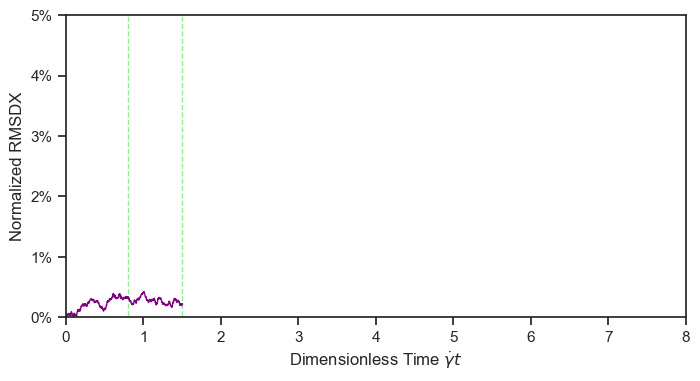

In [11]:
sns.set_style("ticks") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") # paper, notebook, talk, poster
fig = pl.figure(figsize=(8, 4), dpi=100)
ax1 = fig.add_subplot(111)
for i in range(len(pline)):
    ax1.plot([pline[i]]*2, [-4,1], color='lightgreen', linewidth=1, alpha=1, linestyle='--')
ax1.plot(t, [i/x_c for i in rmsdx], linestyle='-', color='purple', linewidth=1, alpha=1)

# ax1.legend(loc=3, ncol=1)
ax1.set_xlim([0,8])
# ax1.set_xticks(range(0,3001,1000))
ax1.set_ylim([0,0.05])
# ax1.set_yticks([0,-np.pi/2,-np.pi])
ax1.set_yticklabels(['{:,.0%}'.format(x/100) for x in range(6)])
ax1.set_xlabel(r'Dimensionless Time $\dot\gamma t$')
ax1.set_ylabel(r'Normalized RMSDX')

# ax2 = fig.add_subplot(122)
# ax2.plot(J_t[1:], J_omega[1:], marker='', color='blue', linewidth=1, alpha=1, label=r'$\omega$')
# ax2.legend(loc=3, ncol=1)
# ax2.set_xlim([0,3150])
# ax2.set_xticks(range(0,3001,500))
# ax2.set_xlabel(r'Time ($\mu s$)')
# ax2.set_ylabel(r'Angular Velocity ($\mu s^{-1}$)')

# fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.2, hspace = 0.2)
# fig.subplots_adjust(wspace = 0.3)

In [12]:
fig.savefig('f1-50RMSDX.png', dpi=200, bbox_inches='tight')